In [60]:
import pandas as pd

In [61]:
data = pd.read_csv('data.csv')
print(data.head())

   Unnamed: 0  ID     Name   Age   Salary Department  Years_Experience Remote
0           0   1  Othmane   NaN      NaN         IT                 0    Yes
1           1   2    Ikram  22.0      NaN         HR                23    Yes
2           2   3      Bob   NaN      NaN         HR                26    Yes
3           3   4    Zineb  59.0  73665.0         HR                 3     No
4           4   5    David  57.0  59325.0    Finance                33     No


In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   ID                100 non-null    int64  
 2   Name              100 non-null    object 
 3   Age               51 non-null     float64
 4   Salary            56 non-null     float64
 5   Department        100 non-null    object 
 6   Years_Experience  100 non-null    int64  
 7   Remote            100 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB
None


In [63]:
print(data.isnull().sum())

Unnamed: 0           0
ID                   0
Name                 0
Age                 49
Salary              44
Department           0
Years_Experience     0
Remote               0
dtype: int64


In [64]:
data['Age'] = data['Age'].median()

In [65]:
data['Salary'] = data['Salary'].fillna(data.groupby('Department')['Salary'].transform('median'))
print(data.isnull().sum())

Unnamed: 0          0
ID                  0
Name                0
Age                 0
Salary              0
Department          0
Years_Experience    0
Remote              0
dtype: int64


In [66]:
data['Remote'] = data['Remote'].map(lambda x: 'Oui' if x == 'Yes' else'Non')
print(data)

    Unnamed: 0   ID     Name   Age   Salary Department  Years_Experience  \
0            0    1  Othmane  45.0  72943.5         IT                 0   
1            1    2    Ikram  45.0  64107.0         HR                23   
2            2    3      Bob  45.0  64107.0         HR                26   
3            3    4    Zineb  45.0  73665.0         HR                 3   
4            4    5    David  45.0  59325.0    Finance                33   
..         ...  ...      ...   ...      ...        ...               ...   
95          95   96      Bob  45.0  82670.0  Marketing                21   
96          96   97      Eva  45.0  59838.0    Finance                12   
97          97   98   Nassim  45.0  45811.0    Finance                14   
98          98   99   Nassim  45.0  73800.0  Marketing                13   
99          99  100  Othmane  45.0  73800.0  Marketing                19   

   Remote  
0     Oui  
1     Oui  
2     Oui  
3     Non  
4     Non  
..    ...  
95 

In [30]:
def apply(annes):
  if annes > 3:
    return 'unior'
  elif  3 <= annes <=7:
    return 'Intermédiaire'
  elif  8 <= annes <=15:
    return 'Senior'
  else:
    return 'expert'
data['Ancienneté_Catégorie'] = data['Years_Experience'].apply(apply)

Partie 3 : Analyses exploratoires et statistiques

In [37]:
moyen_global = data['Salary'].mean()
print(moyen_global)

65145.65500000003


In [39]:
em_max = data['Salary'].max()
print(em_max)

65145.655


In [43]:
salaire_moyen = data.groupby('Department')['Salary'].mean()
print(salaire_moyen)

Department
Finance      65145.655
HR           65145.655
IT           65145.655
Logistics    65145.655
Marketing    65145.655
Name: Salary, dtype: float64


In [44]:
moyen_salaire_anciennete_categorie = data.groupby('Ancienneté_Catégorie')['Salary'].mean()
print(moyen_salaire_anciennete_categorie)

Ancienneté_Catégorie
Intermédiaire    65145.655
expert           65145.655
unior            65145.655
Name: Salary, dtype: float64


In [45]:
midiane_salaire_anciennete_categorie = data.groupby('Ancienneté_Catégorie')['Salary'].median()
print(moyen_salaire_anciennete_categorie)

Ancienneté_Catégorie
Intermédiaire    65145.655
expert           65145.655
unior            65145.655
Name: Salary, dtype: float64


In [68]:
remote = data[data['Remote']=='Oui'].groupby('Department').size()
print(remote)

Department
Finance       7
HR           13
IT            9
Logistics     8
Marketing    18
dtype: int64


 Calculs avancés avec NumPy

In [73]:
import numpy as np
data['Performance'] = np.where(data['Salary'] < 60000 ,'Bon',
                               np.where(data['Salary'] < 80000, 'Moyen','Haut'))
print(data.head())

   Unnamed: 0  ID     Name   Age   Salary Department  Years_Experience Remote  \
0           0   1  Othmane  45.0  72943.5         IT                 0    Oui   
1           1   2    Ikram  45.0  64107.0         HR                23    Oui   
2           2   3      Bob  45.0  64107.0         HR                26    Oui   
3           3   4    Zineb  45.0  73665.0         HR                 3    Non   
4           4   5    David  45.0  59325.0    Finance                33    Non   

  Performance  
0       Moyen  
1       Moyen  
2       Moyen  
3       Moyen  
4         Bon  


In [84]:
x = [
    (data['Age'] < 35) & (data['Years_Experience'] < 5),
    (data['Age'] < 35) & (data['Years_Experience'] >= 5),
    (data['Age'] >= 35) & (data['Years_Experience'] < 5),
    (data['Age'] >= 35) & (data['Years_Experience'] >= 5)
             ]

y = [
    'Jeune & Nouveau',
    'Jeune & Expérimenté',
    'Senior & Nouveau',
    'Senior & Expérimenté']
data['new'] = np.select(x,y)

In [87]:
moyen = data.groupby('Department')['Salary'].transform('mean')
diffenerce = data['Salary'] - moyen
print(diffenerce)

0      2009.000000
1      1311.035714
2      1311.035714
3     10869.035714
4      3636.050000
          ...     
95    10640.520000
96     4149.050000
97    -9877.950000
98     1770.520000
99     1770.520000
Name: Salary, Length: 100, dtype: float64


Visualisation

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Salary', ylabel='Count'>

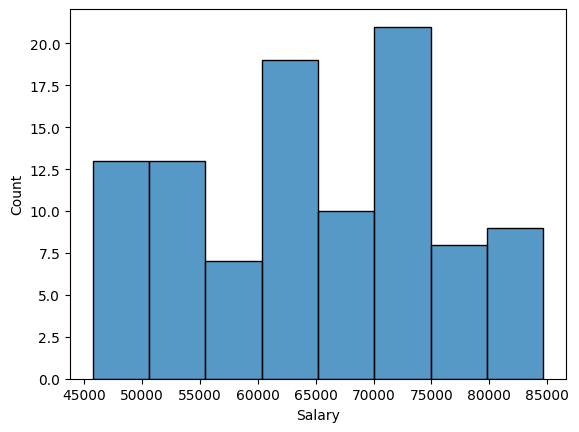

In [90]:
sns.histplot(data['Salary'])

<Axes: xlabel='Department', ylabel='Salary'>

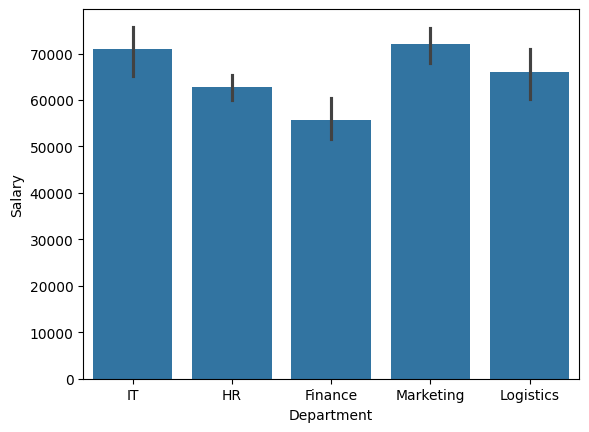

In [92]:
sns.barplot(x = data['Department'], y = data['Salary'])

<Axes: xlabel='Salary', ylabel='Performance'>

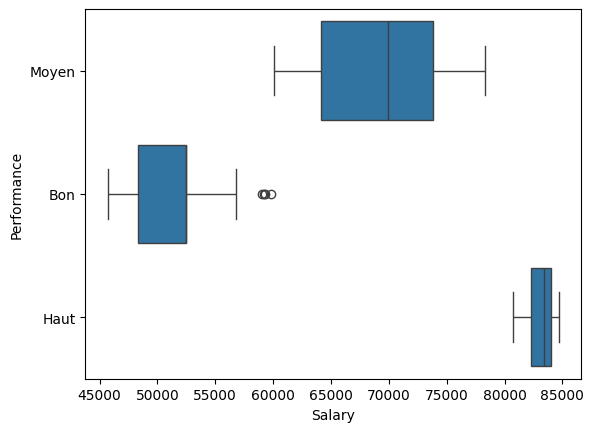

In [93]:
sns.boxplot(x = data['Salary'], y = data['Performance'])